## Importing Libraries and Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

## Reading the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/College Assignments/ML Assign/Data Sets/MLK/Tel-Customer-Churn.csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Structure and Summary

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


After printing the statistics of data we got to know that the data distribution is appropriate.

## Checking the null values

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So there are no null values in the dataset

## Checking the structure of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Check the data types are appropriate and converting them into categories or encoding them wherever required

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [ ]:
for i in cols:
    print(i," ",df[i].unique())

gender   ['Female' 'Male']
SeniorCitizen   [0 1]
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService   ['No' 'Yes']
MultipleLines   ['No phone service' 'No' 'Yes']
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   ['No' 'Yes' 'No internet service']
OnlineBackup   ['Yes' 'No' 'No internet service']
DeviceProtection   ['No' 'Yes' 'No internet service']
TechSupport   ['No' 'Yes' 'No internet service']
StreamingTV   ['No' 'Yes' 'No internet service']
StreamingMovies   ['No' 'Yes' 'No internet service']
Contract   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   [29.85 56.95 53.85 ... 63.1  44.2

In [ ]:
for i in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']:
    df[i].replace('No internet service','No',inplace=True)

In [ ]:
df['MultipleLines'].replace('No phone service','No',inplace=True)
df.Contract.replace('Month-to-month','Month',inplace=True)
df['InternetService'].replace(['DSL','Fiber optic'],'Yes',inplace=True)

In [ ]:
df.TotalCharges.replace(" ","0.0",inplace=True)

In [ ]:
df.TotalCharges = df.TotalCharges.astype(float)

In [ ]:
for i in cols:
    print(i," ",df[i].unique())

gender   ['Female' 'Male']
SeniorCitizen   [0 1]
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService   ['No' 'Yes']
MultipleLines   ['No' 'Yes']
InternetService   ['Yes' 'No']
OnlineSecurity   ['No' 'Yes']
OnlineBackup   ['Yes' 'No']
DeviceProtection   ['No' 'Yes']
TechSupport   ['No' 'Yes']
StreamingTV   ['No' 'Yes']
StreamingMovies   ['No' 'Yes']
Contract   ['Month' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges   [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn   ['No' 'Yes']


## Encoding Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
coltoenc =  ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','Churn']

In [ ]:
for i in coltoenc:
    df[i] = le.fit_transform(df[i])

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,Mailed check,74.40,306.60,1


## Creating Dummies of the variables

In [ ]:
df = pd.get_dummies(data=df,columns=['PaymentMethod'],drop_first=True)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,56.95,1889.50,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15,1,0,0,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,0,0,0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,0,0,0,1
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,103.20,7362.90,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,29.60,346.45,0,0,1,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,74.40,306.60,1,0,0,1


In [ ]:
colformodel  = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn']

In [ ]:
df = df.reindex(columns=colformodel)

In [121]:
for i in colformodel:
    print(i," ",df[i].unique())

gender   [0 1]
SeniorCitizen   [0 1]
Partner   [1 0]
Dependents   [0 1]
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService   [0 1]
MultipleLines   [0 1]
OnlineSecurity   [0 1]
OnlineBackup   [1 0]
DeviceProtection   [0 1]
TechSupport   [0 1]
StreamingTV   [0 1]
StreamingMovies   [0 1]
Contract   [0 1 2]
PaperlessBilling   [1 0]
MonthlyCharges   [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges   [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
PaymentMethod_Credit card (automatic)   [0 1]
PaymentMethod_Electronic check   [1 0]
PaymentMethod_Mailed check   [0 1]
Churn   [0 1]


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,29.85,29.85,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,56.95,1889.50,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,0,1,53.85,108.15,0,0,1,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,1,0,42.30,1840.75,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,70.70,151.65,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,0,0,1,0
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,1,103.20,7362.90,1,0,0,0
7040,0,0,1,1,11,0,0,1,0,0,0,0,0,0,1,29.60,346.45,0,1,0,0
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,0,1,74.40,306.60,0,0,1,1


## Cleaning the Totalcharges column and converting it into numerical value

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,29.85,29.85,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,56.95,1889.50,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,0,1,53.85,108.15,0,0,1,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,1,0,42.30,1840.75,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,70.70,151.65,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,0,0,1,0
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,1,103.20,7362.90,1,0,0,0
7040,0,0,1,1,11,0,0,1,0,0,0,0,0,0,1,29.60,346.45,0,1,0,0
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,0,1,74.40,306.60,0,0,1,1


## Plotting the dist for every feature.

In [ ]:
#sns.pairplot(df)

## Querying the data to get churn based on Contarct types

In [ ]:
a = df[['Churn','Contract','gender']].groupby(['Churn','Contract']).count()

In [ ]:
a

gender
Churn Contract        
0     0           2220
      1           1307
      2           1647
1     0           1655
      1            166
      2             48

In [ ]:
a.reset_index(inplace=True)

In [ ]:
a

,Churn,Contract,gender
0,0,0,2220
1,0,1,1307
2,0,2,1647
3,1,0,1655
4,1,1,166
5,1,2,48


## Plot of Churn vs Contract

Text(37.30639722222223, 0.5, 'Count')

<Figure size 720x720 with 0 Axes>

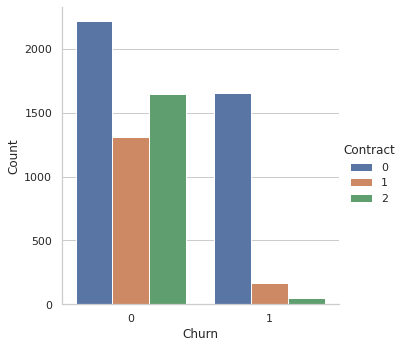

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.catplot(x='Churn',y='gender',hue='Contract',data=a,kind='bar')
plt.ylabel('Count')

 We got to know that people Who have churned are mostly the people which have Month-to-Month Contract.

## Querying the dataset for count of PaperlessBilling based on Churn

In [ ]:
b = df[['PaperlessBilling','Churn','gender']].groupby(['Churn','PaperlessBilling']).count()

In [ ]:
b.reset_index(inplace=True)

In [ ]:
b

,Churn,PaperlessBilling,gender
0,0,0,2403
1,0,1,2771
2,1,0,469
3,1,1,1400


## Plot of PaperlessBilling vs Churn

<Figure size 720x720 with 0 Axes>

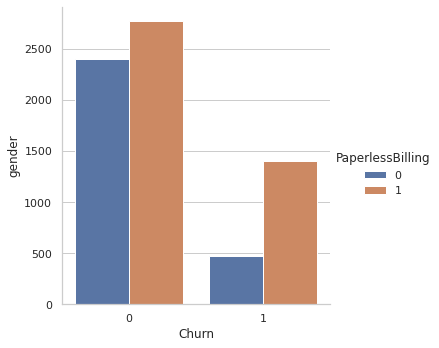

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.catplot(x='Churn', y='gender', hue ='PaperlessBilling',kind='bar', data=b)

So the people who have no paperlessbiling have churned less than the people hwo have paperbilling.

## Data Structure after performing data cleaning/munging

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

## Distribution plot of Tenure

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

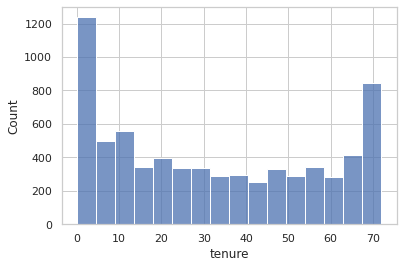

In [ ]:
sns.histplot(df['tenure']);
plt.title

## Distribution plot of Monthly Charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

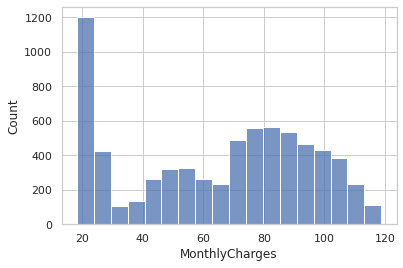

In [ ]:
sns.histplot(df['MonthlyCharges'])

MonthlyCharges data is positively skewed.

## Cleaning the Totalcharges column and converting it into numerical value

## Distribution plot of ToatalCharges

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

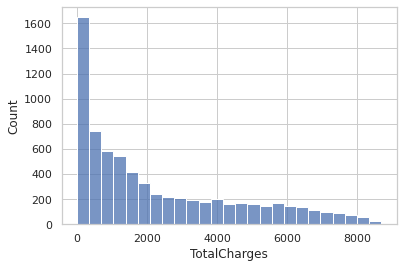

In [ ]:
sns.histplot(df['TotalCharges'])

The data distribution is highly positively skewed.

## Density plot of TotalCharges based on Churn

In [ ]:
#sns.kdeplot('TotalCharges',hue='Churn',data=df,shade=True)

## Density plot of MonthlyCharges based on Churn

In [ ]:
#sns.kdeplot('MonthlyCharges',hue='Churn',data=df,shade=True)

In [ ]:
#cleaneddata = df.copy()

In [ ]:
#cleaneddata.to_csv('cleanedtelchurn.csv',index=False)

<AxesSubplot:>

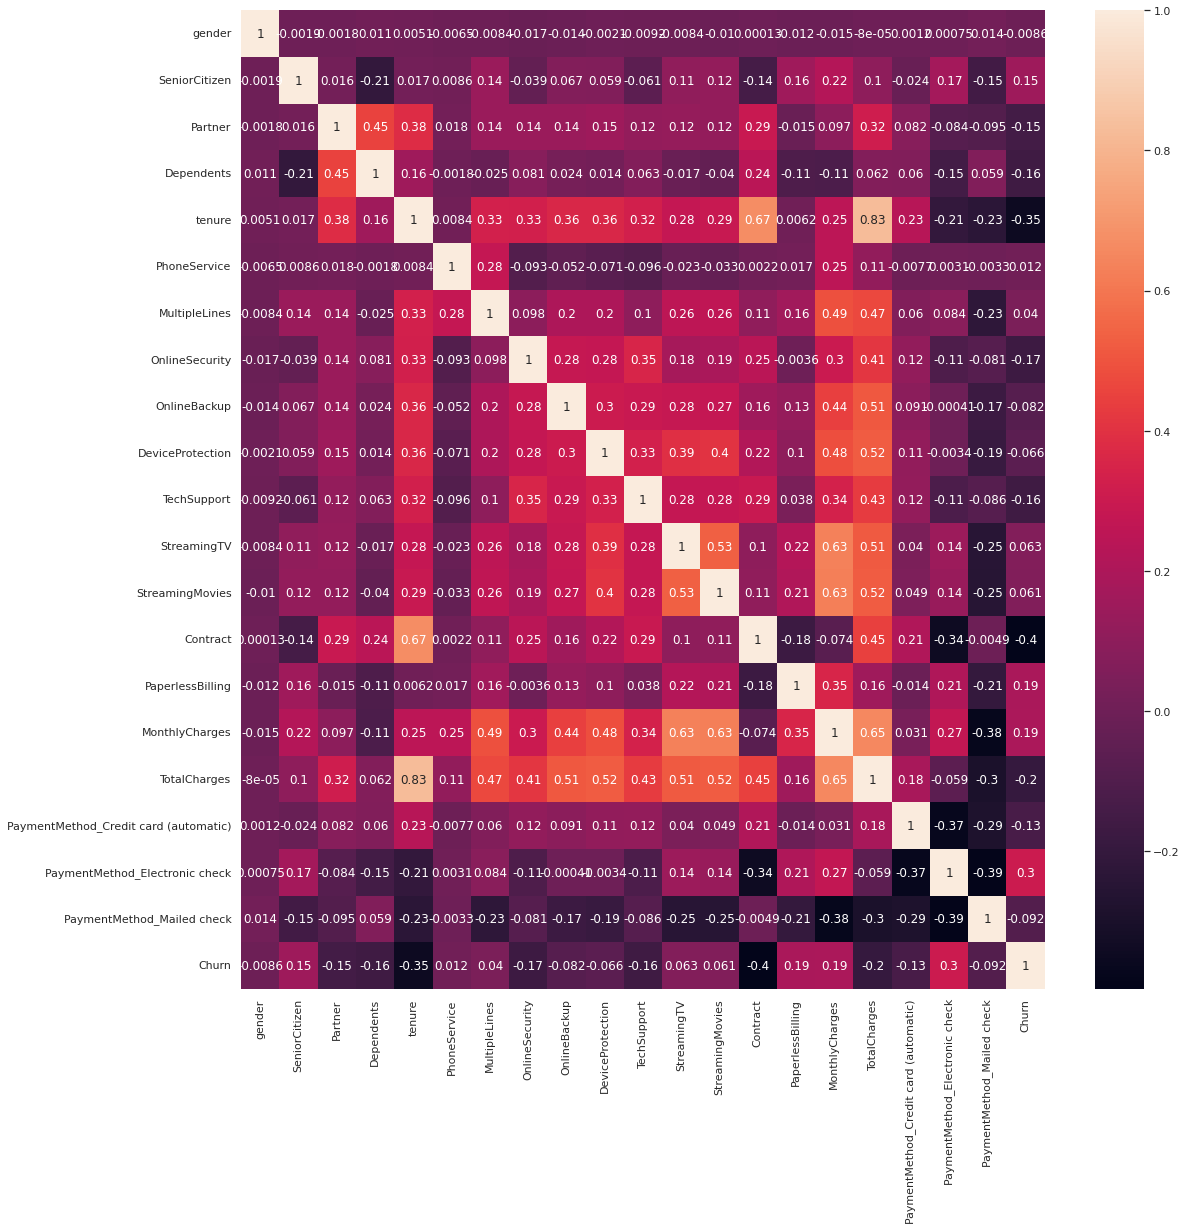

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)

## Model Creation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,29.85,29.85,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,56.95,1889.50,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,0,1,53.85,108.15,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,1,0,42.30,1840.75,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,70.70,151.65,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,1,103.20,7362.90,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,0,0,0,0,1,29.60,346.45,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,0,1,74.40,306.60,0,0,1


## Splitting the Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Creating the Logistic Regression 

In [ ]:
classifier = LogisticRegression(C=0.1)
classifier.fit(X_train,y_train)
ypred = classifier.predict(X_test)
print('Accuracy of the model is:',accuracy_score(y_test,ypred)*100)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))

Accuracy of the model is: 79.91483321504613
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1026
           1       0.69      0.48      0.57       383

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[941  85]
 [198 185]]


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
classifier2 = CatBoostClassifier()
classifier2.fit(X_train,y_train)

Learning rate set to 0.021554
0:	learn: 0.6779066	total: 56.7ms	remaining: 56.6s
1:	learn: 0.6644644	total: 64.2ms	remaining: 32.1s
2:	learn: 0.6503566	total: 75.3ms	remaining: 25s
3:	learn: 0.6380532	total: 81.1ms	remaining: 20.2s
4:	learn: 0.6263867	total: 90ms	remaining: 17.9s
5:	learn: 0.6157161	total: 97.7ms	remaining: 16.2s
6:	learn: 0.6048966	total: 108ms	remaining: 15.4s
7:	learn: 0.5955296	total: 119ms	remaining: 14.7s
8:	learn: 0.5867975	total: 130ms	remaining: 14.3s
9:	learn: 0.5778364	total: 140ms	remaining: 13.9s
10:	learn: 0.5697627	total: 153ms	remaining: 13.8s
11:	learn: 0.5622208	total: 161ms	remaining: 13.2s
12:	learn: 0.5551327	total: 171ms	remaining: 13s
13:	learn: 0.5493155	total: 182ms	remaining: 12.8s
14:	learn: 0.5424860	total: 192ms	remaining: 12.6s
15:	learn: 0.5365391	total: 198ms	remaining: 12.2s
16:	learn: 0.5308460	total: 206ms	remaining: 11.9s
17:	learn: 0.5248738	total: 210ms	remaining: 11.5s
18:	learn: 0.5196965	total: 214ms	remaining: 11s
19:	learn: 0.

In [ ]:
ypred2 = classifier2.predict(X_test)
print('Accuracy of the model is:',accuracy_score(y_test,ypred2)*100)
print('Classification Report:\n',classification_report(y_test,ypred2))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred2))

Accuracy of the model is: 79.20511000709723
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1026
           1       0.67      0.46      0.55       383

    accuracy                           0.79      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[940  86]
 [207 176]]


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier

In [ ]:
classifier3 = XGBClassifier()
classifier3.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
ypred3 = classifier3.predict(X_test)
print('Accuracy of the model is:',accuracy_score(y_test,ypred3)*100)
print('Classification Report:\n',classification_report(y_test,ypred3))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred3))

Accuracy of the model is: 78.35344215755855
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1026
           1       0.63      0.50      0.56       383

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.77      0.78      0.78      1409

Confusion Matrix:
 [[913 113]
 [192 191]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier4 = KNeighborsClassifier(n_neighbors=7)
classifier4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
ypred4 = classifier4.predict(X_test)
print('Accuracy of the model is:',accuracy_score(y_test,ypred4)*100)
print('Classification Report:\n',classification_report(y_test,ypred4))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred4))

Accuracy of the model is: 75.51454932576294
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1026
           1       0.58      0.37      0.45       383

    accuracy                           0.76      1409
   macro avg       0.69      0.63      0.65      1409
weighted avg       0.73      0.76      0.74      1409

Confusion Matrix:
 [[923 103]
 [242 141]]


In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier5 = SVC()
classifier5.fit(X_train,y_train)

SVC()

In [ ]:
ypred5 = classifier5.predict(X_test)
print('Accuracy of the model is:',accuracy_score(y_test,ypred5)*100)
print('Classification Report:\n',classification_report(y_test,ypred5))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred5))

Accuracy of the model is: 72.81760113555713
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1026
           1       0.00      0.00      0.00       383

    accuracy                           0.73      1409
   macro avg       0.36      0.50      0.42      1409
weighted avg       0.53      0.73      0.61      1409

Confusion Matrix:
 [[1026    0]
 [ 383    0]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier6 = RandomForestClassifier(n_estimators=1000)
classifier6.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
ypred6 = classifier6.predict(X_test)
print('Accuracy of the model is:',accuracy_score(y_test,ypred6)*100)
print('Classification Report:\n',classification_report(y_test,ypred6))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred6))

Accuracy of the model is: 78.42441447835344
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1026
           1       0.66      0.42      0.52       383

    accuracy                           0.78      1409
   macro avg       0.74      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409

Confusion Matrix:
 [[943  83]
 [221 162]]
